In [59]:
import os
import pandas as pd


In [60]:
 
path = r"./data/"
df = pd.DataFrame()     

for namedir in os.listdir(path):
    directory  = os.path.join(path, namedir)
    if os.path.isdir(directory):
        for namefile in os.listdir(directory):
            file = os.path.join(directory, namefile)
            if file.endswith(".csv"):
                df_csv = pd.read_csv(file)
                df_csv["Activity"] = namedir
                df = pd.concat([df, df_csv])


df

,accelerometer_X,accelerometer_Y,accelerometer_Z,Activity
0,1.000776,4.616021,8.576031,idle
1,0.718261,4.209007,8.446744,idle
2,-0.909797,-0.282516,9.203311,idle
3,5.099650,0.148441,8.418014,idle
4,1.762132,-0.162806,9.251195,idle
...,...,...,...,...
25,5.109226,-15.452178,-1.470040,walking
26,6.373365,-11.741165,-8.226476,walking
27,3.289633,-9.993398,-0.383072,walking
28,-2.978387,-3.050213,1.273715,walking


In [61]:

X = df.drop("Activity", axis=1)
y = df["Activity"]

In [62]:
X

,accelerometer_X,accelerometer_Y,accelerometer_Z
0,1.000776,4.616021,8.576031
1,0.718261,4.209007,8.446744
2,-0.909797,-0.282516,9.203311
3,5.099650,0.148441,8.418014
4,1.762132,-0.162806,9.251195
...,...,...,...
25,5.109226,-15.452178,-1.470040
26,6.373365,-11.741165,-8.226476
27,3.289633,-9.993398,-0.383072
28,-2.978387,-3.050213,1.273715


In [63]:
y

0        idle
1        idle
2        idle
3        idle
4        idle
       ...   
25    walking
26    walking
27    walking
28    walking
29    walking
Name: Activity, Length: 193860, dtype: object

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 52)

 модель SVM 

In [65]:
from sklearn import svm

svc = svm.SVC()
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)

 модель RandomForest

In [72]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(max_depth=15, random_state=0, n_estimators=100)
model.fit(X_train, y_train)

randomforest_pred = model.predict(X_test)


In [73]:
from sklearn.metrics import accuracy_score

accuracy_cvc = accuracy_score(y_test, svc_pred)
print(f"SVC Accuracy: {accuracy_cvc}")

accuracy_rf = accuracy_score(y_test, randomforest_pred)
print(f"Random Forest Accuracy: {accuracy_rf}")

SVC Accuracy: 0.891880738677396
Random Forest Accuracy: 0.982688538120293


In [ ]:
"метод classification report для порівняння"

In [74]:
from sklearn.metrics import classification_report

cvc_classification_report = classification_report(y_test, svc_pred )
print(cvc_classification_report)


              precision    recall  f1-score   support

        idle       0.96      0.99      0.97      7862
     running       0.93      0.90      0.91     25343
      stairs       1.00      0.00      0.00      1229
     walking       0.80      0.90      0.85     14031

    accuracy                           0.89     48465
   macro avg       0.92      0.70      0.68     48465
weighted avg       0.90      0.89      0.88     48465



In [75]:

rf_classification_report = classification_report(y_test, randomforest_pred, zero_division= True)
print(rf_classification_report)

              precision    recall  f1-score   support

        idle       1.00      1.00      1.00      7862
     running       1.00      0.98      0.99     25343
      stairs       1.00      0.71      0.83      1229
     walking       0.95      1.00      0.97     14031

    accuracy                           0.98     48465
   macro avg       0.99      0.92      0.95     48465
weighted avg       0.98      0.98      0.98     48465



Confusion RandomForest matrix:
[[ 7860     0     0     2]
 [    4 24893     0   446]
 [    2    25   875   327]
 [    0    32     1 13998]]
 
 SVC matrix:
[[ 7772    65     0    25]
 [  303 22802     0  2238]
 [    8   306     3   912]
 [   48  1335     0 12648]]


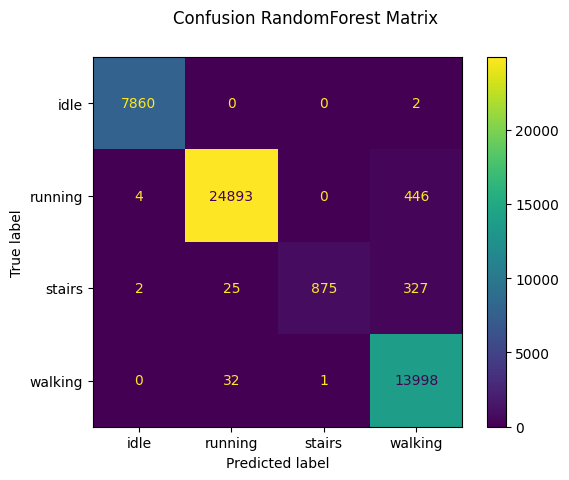

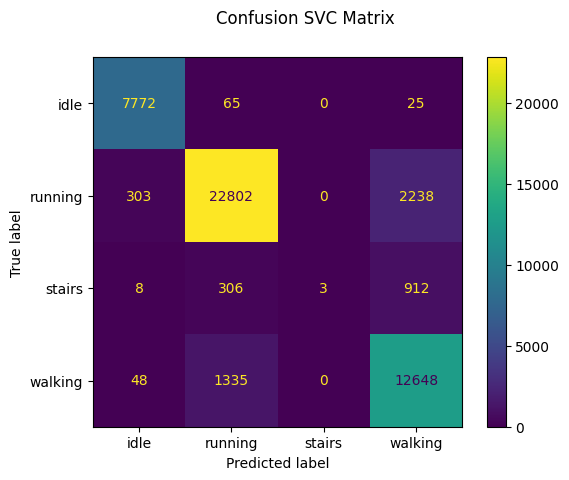

In [81]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

"матриця плутанини: справжніх значень і прогнозованих значень"
disp = ConfusionMatrixDisplay.from_predictions(y_test, randomforest_pred)
disp2 = ConfusionMatrixDisplay.from_predictions(y_test, svc_pred)
disp.figure_.suptitle("Confusion RandomForest Matrix")
disp2.figure_.suptitle("Confusion SVC Matrix")
print(f"Confusion RandomForest matrix:\n{disp.confusion_matrix}\n \n SVC matrix:\n{disp2.confusion_matrix}")

plt.show()

Прогнозируемые показатели  классов вышли более точные в методе RandomForestClassifier , при увеличение n_estimators -  количества  деревьев в методе(ансамбле) и максимальной глубины дерева.
Проверив оба типа моделей , в моем случае RandomForestClassifier был и быстрее и точнее (возможно потому что используемые моделями RandomForestClassifier  являются многоклассовыми)